<img src="https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/images/logos/ColorLogo.png">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/master/02_Analisis_Estadistico/notebook/solutions/Practica2_UnPocodeEDAWoAns.ipynb)

<h1><center>Practica de Estadística</center></h1>

### Ciclo de vida de la ciencia de datos:

Como hemos visto a lo largo de este diplomado, todo iniciado en ciencias de datos seguimos ciertos pasos base para un mejor entendimiento de lo que se hace.

Entre estos pasos tenemos los siguientes:

   * 1.- Definición de la hipótesis
   * 2.- Adquisición de datos
   * 3.- Análisis exploratorio de datos
   * 4.- Construcción de modelo
   * 5.- Reporte de resultados
   * 6.- Producto final
   
![alt text](https://miro.medium.com/max/1400/0*7M9FK6orsn4RdUFb.png)
  
  
---

En las primeras etapas, nos enfocamos en el análisis exploratorio de datos **Univariados** (proporciona un panorama del conjunto de datos crudos para una variable), **Bivariados** (para encontrar relaciones entre cada variable en el conjunto de datos y la variable 'objetivo' de interes o simplemente encontrar la relación entre 2 variables) y **Multivariados** (principalmente para entender interacciones entre diferentes 'campos' del conjunto de datos o encontrar relaciones entre más de 2 variables).



Empecemos por detalles para la práctica...

Implementar el Análisis Estadístico (Exploratorio) de Datos (**EDA**, por sus siglas en inglés) usando python es muy fácil porque python tiene una miríada de paquetes de análisis estadístico (por ejemplo, numpy, pandas, matplotlib, etc.). 

Realizaremos en esta práctica los análisis exploratorios para cada uno de los tipos de análisis paso a paso usando python y sacaremos algunas conclusiones.

In [ ]:
#importamos las librerias de siempre...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importamos el conjunto de datos:

In [1]:
import pandas as pd
# leer el dataframe usando read_csv
df = pd.read_csv("C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/data/Employee.csv", sep=',', header=0)
# mostrar los primeros elementos con head
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Análisis Univariado

### Podemos realizar un análisis general de los datos

Una vez que cargamos los datos, estamos listos para el primer tipo de EDA llamado análisis univariado. Básicamente nos dice cómo se distribuyen los datos en cada característica y también nos informa sobre tendencias centrales como la media, la mediana y la moda.

Por lo que parte de este ejercicio será realizar un análisis descriptivo de los datos

### Estadística Descriptiva

Primero lo primero, verifique las medidas de las tendencias centrales de media, mediana y moda, verifique los valores mínimos y máximos y los cuantiles de cada característica.

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


De la tabla anterior, podemos ver que el nivel de satisfacción promedio entre los empleados es de solo 61.12%, donde se desvía en un 24%, lo que significa que hay mucha variación entre la satisfacción de los empleados que afecta directamente la productividad. 


En esta sección utilizaremos la mediana, dado que no se ve afectada por la presencia de valores atípicos, mientras que la media si se ve afectada fácilmente.

### Variables categóricas

Hemos visto que en la presencia de este tipo de variables, se utilizan las tablas de frencuencias para realizar análisis. ¿Cómo obtendríamos dicho análisis para la variable de salario?

In [5]:
#Revisando el tipo de dato: categorico o continuo
df.salary.value_counts()
#pd.value_counts(df['salary'])

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [6]:
# tabla de frecuencia relativa de pasajeros
100 * df['salary'].value_counts() / len(df['salary'])

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

¿Y para la variable de departamentos?

In [7]:
pd.value_counts(df['Departments '])

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments , dtype: int64

In [8]:
# tabla de frecuencia relativa de pasajeros
100 * df['Departments '].value_counts() / len(df['Departments '])

sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: Departments , dtype: float64

De lo anterior, podemos decir que casi el 48% de los empleados tienen un salario bajo y solo el 8% de los empleados tiene un salario alto.

### Visualización

   * Histograma
En el análisis univariado, usamos histogramas para analizar y visualizar la distribución de frecuencias. Trazar histogramas en pandas es muy fácil y directo. ¿Cómo podríamos hacer un histograma considerando las horas promedio de los trabajadores?

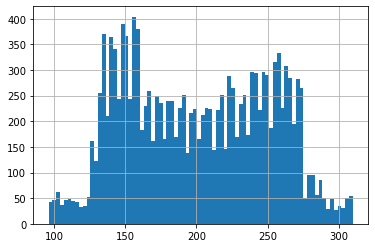

In [9]:
plot = df['average_montly_hours'].hist(bins=80).plot(kind='bar', title='Average monthly hours')

De la imagen de arriba vemos que los datos no se distribuyen normalmente, por lo que no podemos realizar muchas operaciones estadísticas con estos datos.


## Desafío Adicional (No calificado)

En la práctica de estadística, realizaste un pequeño análisis de datos discordantes (atípicos) a un conjunto de datos simulados, donde además aplicaste la prueba de shapiro - wilks para comprobar la normalidad de los datos. creaste un modelo para identificar imágenes de dígitos escritos a mano.

Para este nuevo conjunto de datos, ¿podrías usar dicha metodología para encontrar si es posible aplicar algún tipo de estadística?

Siguiendo los siguientes pasos:

 * Aplicar Shapiro Wilks con un alpha = 0.05
 * Aplicar el módulo de detección de outliers de Dixon Q test a este conjunto de datos de 'horas promedio' y verificar si existe o existen outliers.
 * En caso positivo, remover los datos detectados como outliers y volver a aplicar Shapiro con el nuevo tamaño de muestra
 * Nota: al aplicar pruebas de discordancia, el valor que ha pasado la hipótesis alterna (H1) es detectado como valor discordante y por ende, se debe retirar de la muestra y volver a aplicar la prueba de discordancia, pero ahora para el conjunto de datos con n-1 valores. Así, hasta obtener H0 (est <= cv)
 
 Las siguientes líneas se dejan libres para código.


In [10]:
from scipy.stats import shapiro
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def Test_Shapiro(data,cv_datos):
    stat, p = shapiro(data)    
    print('stat=%.3f, p=%e' % (stat, p)) 

    if stat <= cv_datos:
        print('Sample does not look Gaussian (reject H0)')
    else:
        print('Sample looks Gaussian (fail to reject H0)')
    sns.distplot(data)
    plt.show()     

stat=0.963, p=0.000000e+00
Sample looks Gaussian (fail to reject H0)


C:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


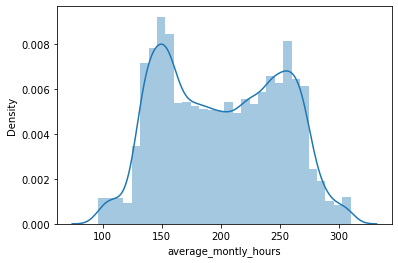

In [12]:
Test_Shapiro(df['average_montly_hours'],0.947)

In [40]:
def q_test(dataset):
    return (dataset[1] - dataset[0])/(dataset[len(dataset)-1] - dataset[0])

In [41]:
def Test_Dixon(data,qtestCV_datos):
    stat = q_test(np.sort(data) )
    print('stat=%.3f, CL=%.3f' % (stat, qtestCV_datos))
    if stat < qtestCV_datos:
        print('There is no outliers (fail to reject H0)')
    else:
        print('There is outliers (reject H0)')          
    ax = sns.distplot(data, color = 'blue')
    ax.set_title('Distribucion normal')
    ax.axvline(x = qtestCV_datos, linestyle = '--', label = 'valor critico')
    ax.axvline(x = stat, linestyle = '--', label = 'valor estadistico', color = 'k')
    ax.legend() 
    plt.show() 

stat=0.000, CL=0.185
There is no outliers (fail to reject H0)


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


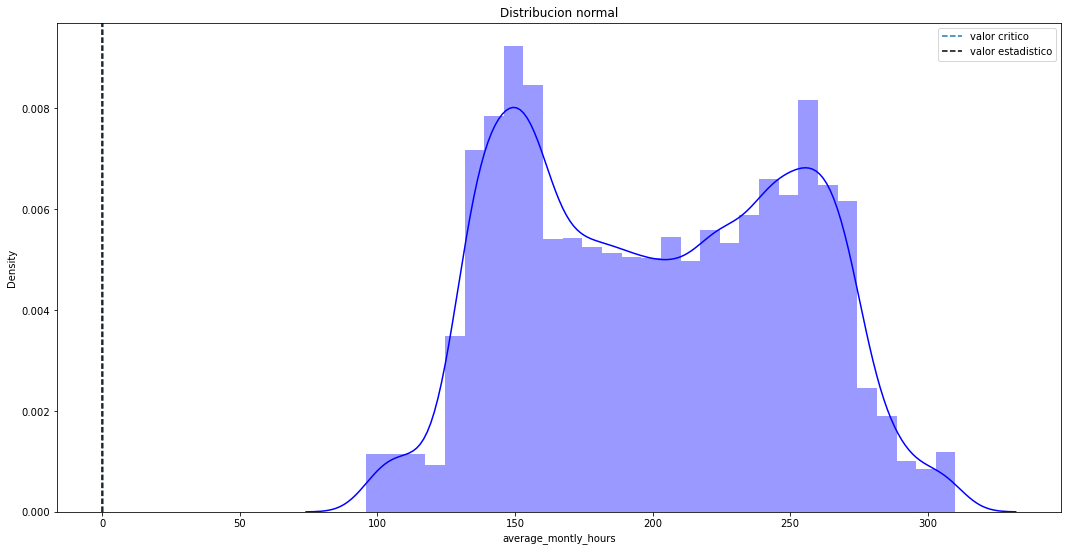

In [42]:
Test_Dixon(df['average_montly_hours'],0.1846)

## Análisis Bivariado / Multivariado

Los datos sin relaciones entre variables son el equivalente en ciencia de datos a un lienzo en blanco. 

Para pintar la imagen, necesitamos entender cómo las variables interactúan entre sí. ¿Un aumento en una variable se correlaciona con un aumento en otra? ¿Se relaciona con una disminución en otro lugar? La mejor manera de pintar la imagen es mediante el uso de gráficos que permiten estas posibilidades.

In [16]:
import pandas as pd
#<completar>
#https://raw.githubusercontent.com/davestroud/Wine/master/winemag-data_first150k.csv

import pandas as pd
reviews = pd.read_csv("https://raw.githubusercontent.com/davestroud/Wine/master/winemag-data_first150k.csv", index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [17]:
#Imprime la cantidad de filas y columnas de este conjunto de datos
m,n = reviews.shape
print("Number of raws:", m)
print("Number of columns:", n)
#print("   Número de filas= ",reviews.shape[0])
#print("Número de columnas= ",reviews.shape[1])

Number of raws: 150930
Number of columns: 10


A partir de aquí surgen diversas cuestiones extrañas...

"Para hacernos una imagen de los datos, lo primero que tenemos que hacer es agruparlos". 

Primero acotaremos el conjunto de datos, dado que por el momento analizar más de 150k de registros es bastante.
Generaremos una muestra aleatoria del 1% de los datos utilizando el método de 'sample' de pandas.

In [19]:
test = reviews.sample(frac=0.01, replace=True, random_state=1)
test

,country,description,designation,points,price,province,region_1,region_2,variety,winery
128037,Italy,"Warm and inviting, Giacomo Fenocchio's Barbera...",NaN,86,22.0,Piedmont,Barbera d'Alba Superiore,NaN,Barbera,Giacomo Fenocchio
5192,Argentina,"Rubbery, drawn aromas include smoky black frui...",Finca Rosa,86,11.0,Mendoza Province,Tupungato,NaN,Cabernet Sauvignon,Domaine Jean Bousquet
50057,Italy,"A silky blend of Chardonnay, Pinot Bianco and ...",Brut,89,20.0,Lombardy,Franciacorta,NaN,Sparkling Blend,Quadra
109259,Italy,"Here's a dark, well-concentrated Brunello Rise...",Le Due Sorelle Riserva,94,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese Grosso,Tenuta La Fuga
73349,US,Don't look for subtlety in this Syrah. It's al...,Estate,87,48.0,California,Dry Creek Valley,Sonoma,Syrah,Vineyard of Pasterick
...,...,...,...,...,...,...,...,...,...,...
109496,US,"From the heart of Pinot Noir country, this ico...",Hyland Vineyard,89,50.0,Oregon,McMinnville,Willamette Valley,Pinot Noir,Soléna
133518,Spain,"Deep black fruit aromas make it inviting, whil...",Carivin Reserve,87,19.0,Northern Spain,Cariñena,NaN,Tempranillo,Grandes Vinos y Viñedos
91316,US,"A fine Pinot for drinking now. Dry and silky, ...",NaN,89,34.0,California,Santa Maria Valley,Central Coast,Pinot Noir,Foxen
138465,Argentina,Some barrel influence works its way onto the l...,Don David Reserve,86,16.0,Other,Cafayate,NaN,Chardonnay,Michel Torino


En la siguiente sección ustedes realizaran un análisis categórico, parecido al ejercicio realizado con el conjunto de datos del titanic.

Consideraremos los 1509 renglones de las variables: país, variedad y precio.

Primero realizaremos la tabla de frecuencias de las variedades de los vinos. En las siguientes líneas ustedes deberán presentar lo que se pide.

In [20]:
#Tabla de frecuencias
print(test['variety'].value_counts())

Cabernet Sauvignon            161
Chardonnay                    152
Pinot Noir                    120
Red Blend                      93
Bordeaux-style Red Blend       65
                             ... 
Vranec                          1
Teroldego                       1
G-S-M                           1
Sauvignon Blanc-Chardonnay      1
Austrian Red Blend              1
Name: variety, Length: 144, dtype: int64


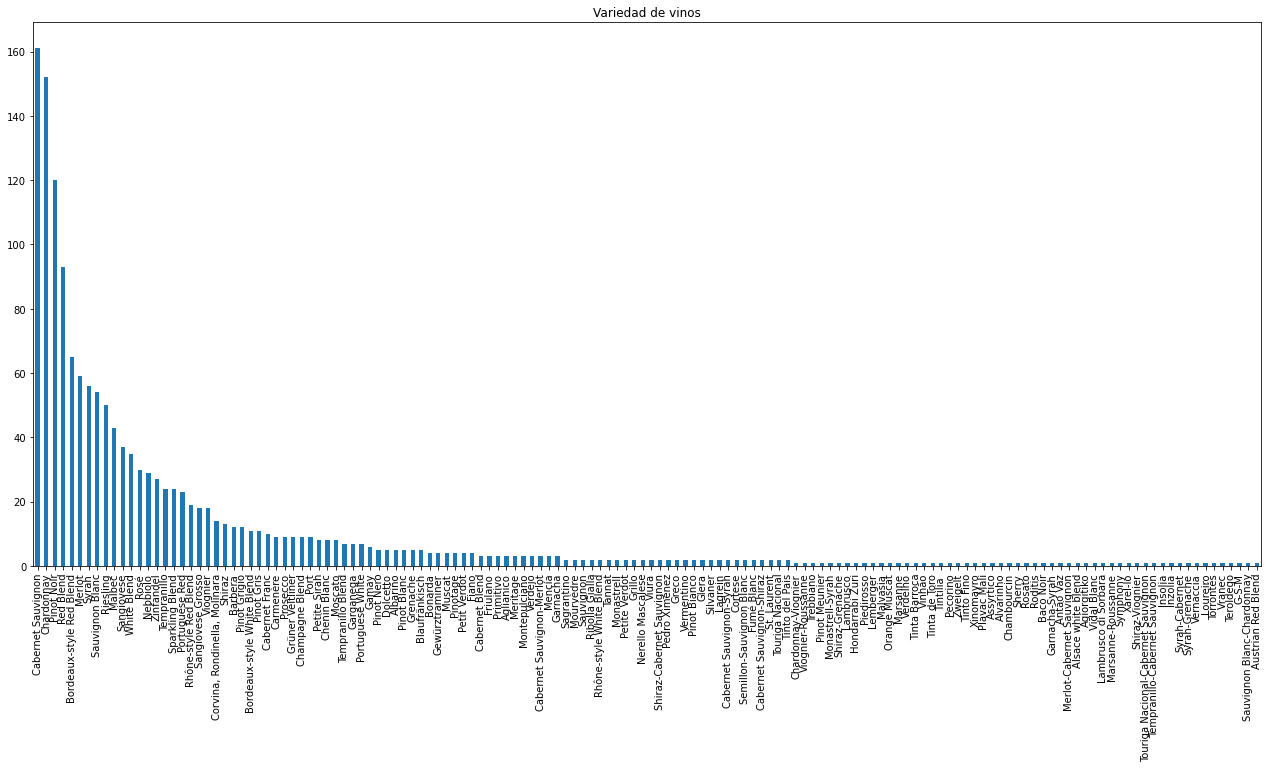

In [21]:
#Gráfico de barras para la variedad
plt.figure(figsize=(22,10))
plot = test['variety'].value_counts().plot(kind='bar', title='Variedad de vinos') 

Probablemente la variedad de Cabernet Sauvignon sea aquella que predomine en este tipo de vinos.

Ahora, sería obtener la relación en la tabla de contigencia entre la variedad y los países.

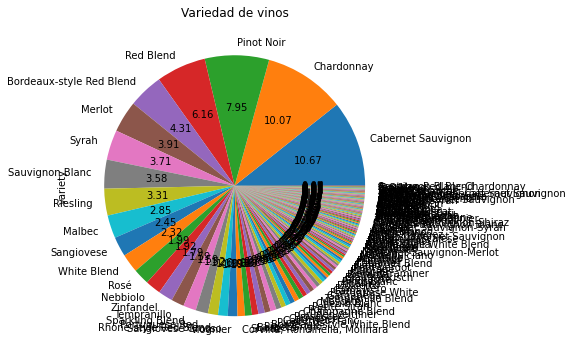

In [23]:
#Gráfico de pastel para la variedad
plot = test['variety'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Variedad de vinos')

In [24]:
# Tabla de contingencia en porcentajes relativos total
pd.crosstab(index=test['variety'],
            columns=test['country'], margins=True)

country,Argentina,Australia,Austria,Canada,Chile,Croatia,France,Germany,Greece,Hungary,...,Macedonia,Moldova,New Zealand,Portugal,Romania,South Africa,Spain,Turkey,US,All
variety,,,,,,,,,,,,,,,,,,,,,
Agiorgitiko,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
Aglianico,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Albariño,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,1,5
Alsace white blend,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Alvarinho,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xarel-lo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
Xinomavro,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
Zinfandel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27,27



Al igual de como habíamos visto con las tablas de frecuencia, también nos podría ser útil representar a las tablas de contingencia con porcentajes relativos; esto lo podríamos realizar utilizando el método apply.


In [25]:
# Tabla de contingencia en porcentajes relativos total
pd.crosstab(index=test['variety'], columns=test['country'],
            margins=True).apply(lambda r: r/len(test) *100,
                                axis=1)

country,Argentina,Australia,Austria,Canada,Chile,Croatia,France,Germany,Greece,Hungary,...,Macedonia,Moldova,New Zealand,Portugal,Romania,South Africa,Spain,Turkey,US,All
variety,,,,,,,,,,,,,,,,,,,,,
Agiorgitiko,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066269,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066269
Aglianico,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198807
Albariño,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265076,0.000000,0.066269,0.331345
Alsace white blend,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066269,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066269
Alvarinho,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.066269,0.000000,0.000000,0.000000,0.000000,0.000000,0.066269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xarel-lo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066269,0.000000,0.000000,0.066269
Xinomavro,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066269,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066269
Zinfandel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.789264,1.789264


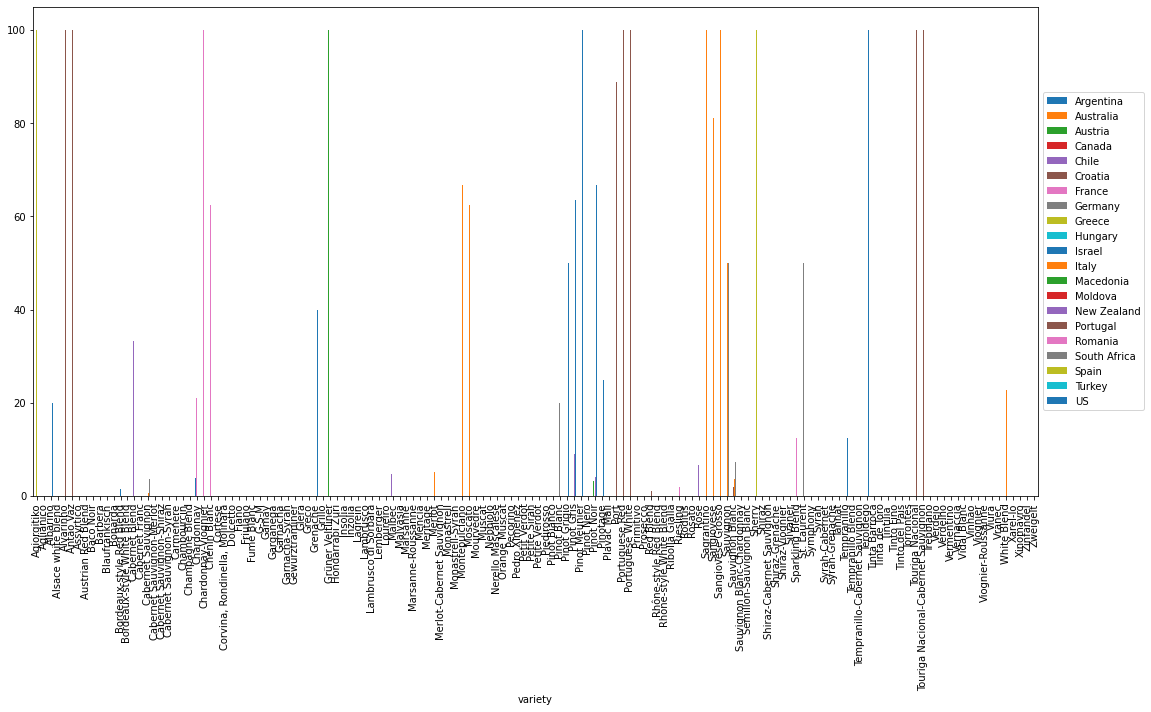

In [26]:
plt.rcParams["figure.figsize"] = [18,9]
plot=pd.crosstab(index=test['variety'],
            columns=test['country']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



¿Qué otras variables o mezcla de variables sería interesante visualizar?




## Desafío Adicional (No calificado)

¿Será posible obtener de qué país y que tipo de variedad es aquella que presenta un precio (price) aceptable con respecto a la calidad de la clasificación del vino (points) y estos resultados plasmarlos en una tabla?

¿Habrá forma de obtener de que país se encuentran los mejores vinos considerando el mayor puntaje y la relación que existe con la variedad del mismo?

El análisis de discordancia (univariado) pudiera aplicarse a cualquier conjunto de datos presentados en esta notebook, ¿será posible realizarlo para los precios y/o puntos de los vinos?

El mismo análisis será bivariado de los vinos, ¿podrá ser aplicado al de empleados para visualizar cuales son las áreas de trabajo con menor salario?

In [27]:
test.to_csv("winesSample.csv")

In [29]:
test

,country,description,designation,points,price,province,region_1,region_2,variety,winery
128037,Italy,"Warm and inviting, Giacomo Fenocchio's Barbera...",NaN,86,22.0,Piedmont,Barbera d'Alba Superiore,NaN,Barbera,Giacomo Fenocchio
5192,Argentina,"Rubbery, drawn aromas include smoky black frui...",Finca Rosa,86,11.0,Mendoza Province,Tupungato,NaN,Cabernet Sauvignon,Domaine Jean Bousquet
50057,Italy,"A silky blend of Chardonnay, Pinot Bianco and ...",Brut,89,20.0,Lombardy,Franciacorta,NaN,Sparkling Blend,Quadra
109259,Italy,"Here's a dark, well-concentrated Brunello Rise...",Le Due Sorelle Riserva,94,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese Grosso,Tenuta La Fuga
73349,US,Don't look for subtlety in this Syrah. It's al...,Estate,87,48.0,California,Dry Creek Valley,Sonoma,Syrah,Vineyard of Pasterick
...,...,...,...,...,...,...,...,...,...,...
109496,US,"From the heart of Pinot Noir country, this ico...",Hyland Vineyard,89,50.0,Oregon,McMinnville,Willamette Valley,Pinot Noir,Soléna
133518,Spain,"Deep black fruit aromas make it inviting, whil...",Carivin Reserve,87,19.0,Northern Spain,Cariñena,NaN,Tempranillo,Grandes Vinos y Viñedos
91316,US,"A fine Pinot for drinking now. Dry and silky, ...",NaN,89,34.0,California,Santa Maria Valley,Central Coast,Pinot Noir,Foxen
138465,Argentina,Some barrel influence works its way onto the l...,Don David Reserve,86,16.0,Other,Cafayate,NaN,Chardonnay,Michel Torino


In [28]:
test.describe()

,points,price
count,1509.000000,1390.000000
mean,87.652750,32.705755
std,3.248754,33.200773
min,80.000000,5.000000
25%,85.000000,15.000000
50%,87.000000,24.000000
75%,90.000000,40.000000
max,96.000000,450.000000


In [30]:
test1 = reviews[["country", "variety","points","price"]]
#test1.to_csv("winesSample.csv")

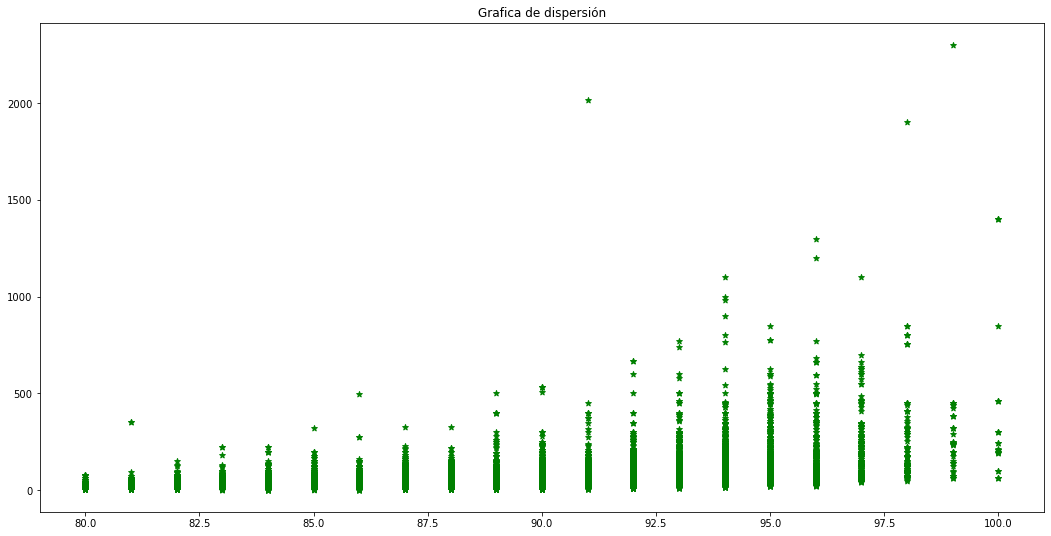

In [31]:
# Gráfica de dispersión
plt.scatter(reviews['points'], reviews['price'], marker='*', color='g')
plt.title('Grafica de dispersión')
plt.show()

In [32]:
temp=test1[ (test1['price'] <=100 ) & (test1['points'] >= 95 )]
temp

,country,variety,points,price
2,US,Sauvignon Blanc,96,90.0
3,US,Pinot Noir,96,65.0
4,France,Provence red blend,95,66.0
5,Spain,Tinta de Toro,95,73.0
6,Spain,Tinta de Toro,95,65.0
...,...,...,...,...
145677,US,Cabernet Sauvignon,95,50.0
146606,US,Cabernet Sauvignon,95,100.0
148048,US,Pinot Noir,96,45.0
150563,Australia,Shiraz,95,70.0


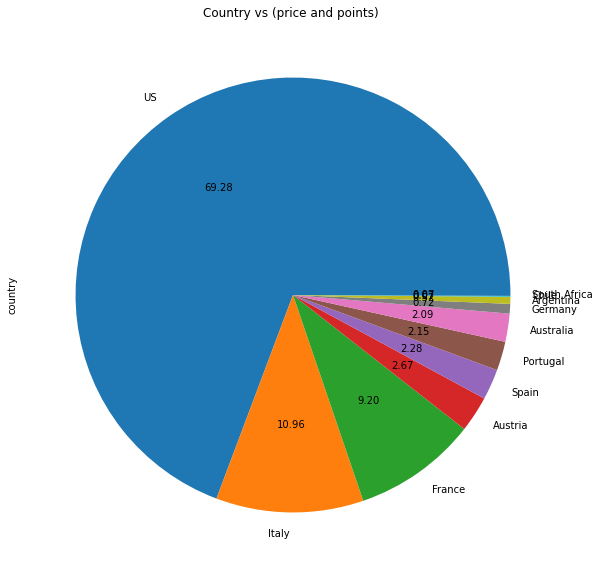

In [33]:
plot = temp['country'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(10, 10),
                                            title='Country vs (price and points) ')

In [34]:
temp1=reviews[reviews['points']>=94]   #Obtener los registros con los vinos de mayor calidad
temp1=reviews[['country','winery']]
temp2=temp1.groupby("country").count()       #Contar los vinos por país

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64


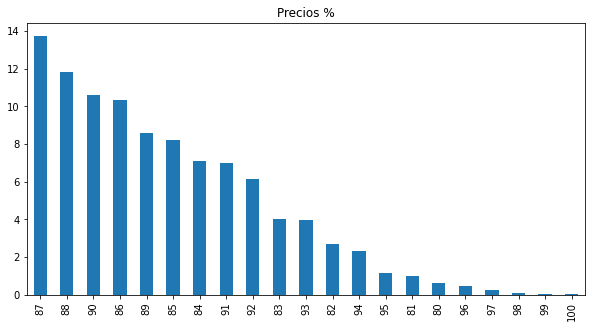

In [35]:
#Revisando el tipo de dato: categorico o continuo
print(reviews.points.value_counts())     #<Completar>
plt.figure(figsize=(10,5))
plot = (100 * reviews.points.value_counts() / len(reviews.points)).plot(kind='bar', title='Precios %')
plt.show()

stat=0.000, CL=0.185
There is no outliers (fail to reject H0)


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


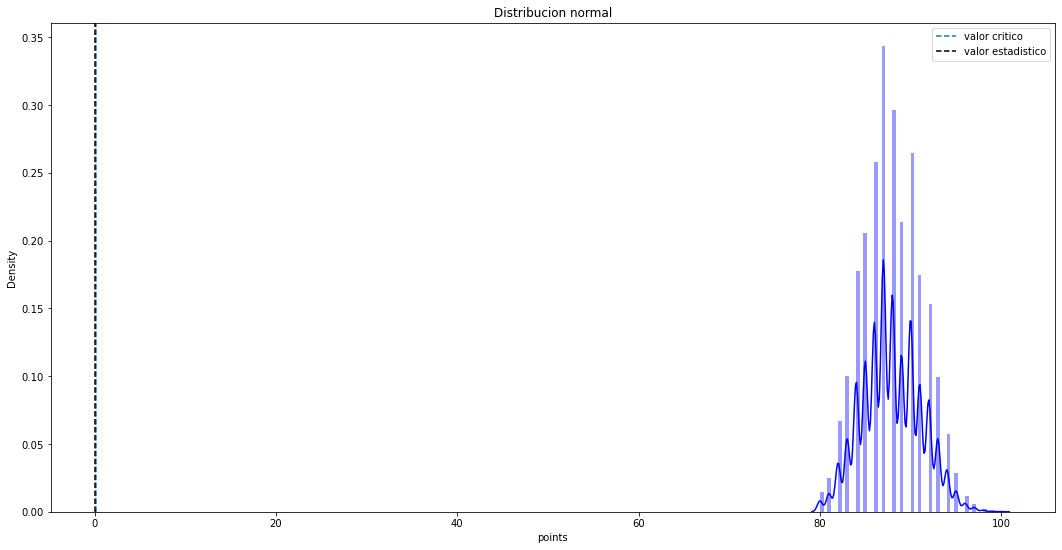

In [36]:
Test_Dixon(reviews['points'],0.1846)

stat=0.000, CL=0.185
There is no outliers (fail to reject H0)


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


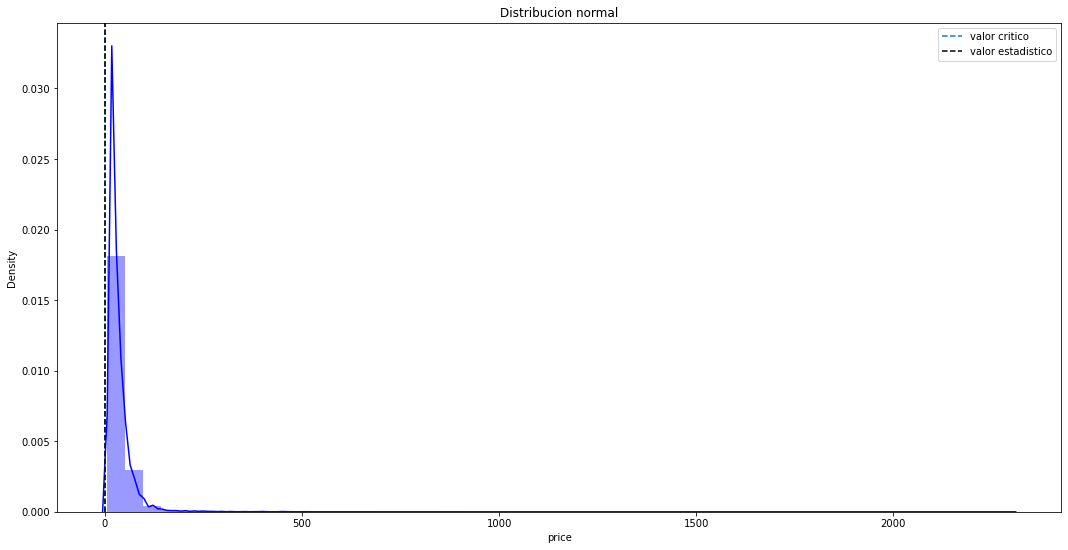

In [37]:
Test_Dixon(reviews['price'].dropna(),0.1846)

In [38]:
temp3=df[df['salary']=='low']   #Obtener los registros con los vinos de mayor calidad
temp3.groupby('Departments ').count().sort_values('salary')     #Contar los vinos por país

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
Departments,,,,,,,,,
management,180,180,180,180,180,180,180,180,180
hr,335,335,335,335,335,335,335,335,335
accounting,358,358,358,358,358,358,358,358,358
RandD,364,364,364,364,364,364,364,364,364
marketing,402,402,402,402,402,402,402,402,402
product_mng,451,451,451,451,451,451,451,451,451
IT,609,609,609,609,609,609,609,609,609
support,1146,1146,1146,1146,1146,1146,1146,1146,1146
technical,1372,1372,1372,1372,1372,1372,1372,1372,1372
